In [1]:
import pandas as pd
import sklearn 

In [2]:
df = pd.read_csv('Roman Urdu DataSet.csv')

In [3]:
df.head()

,Comment,Sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [4]:
df["Comment"]

0        Sai kha ya her kisi kay bus ki bat nhi hai lak...
1                                                sahi bt h
2                                              Kya bt hai,
3                                               Wah je wah
4                                     Are wha kaya bat hai
                               ...                        
20224             Hamari jese awam teli laga k mazay leti 
20225    Kaash hum b parhay likhay hotayKabhi likhtay g...
20226    Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...
20227                       aanti toh gussa e kr gai hain 
20228    mai b sirf shadi kanry ki waja say imran khan ...
Name: Comment, Length: 20229, dtype: object

In [5]:
df["Sentiment"] 

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
20224    Negative
20225    Negative
20226    Negative
20227    Negative
20228    Positive
Name: Sentiment, Length: 20229, dtype: object

In [6]:
import nltk
import string
import re

In [7]:
toy_set = df.head()
comment_list = []
pattern = re.compile("^[a-zA-Z]+$")
for idx, comments in df.iterrows():
    words = nltk.word_tokenize(str(comments['Comment']))
    for word in words:
        if not pattern.match(word):
            words.remove(word)
    comment_list.append(words)
            
print(len(comment_list))

20229


In [8]:
import gensim
from gensim.models import Word2Vec

In [9]:
word2vec_model = Word2Vec(sentences=comment_list)
# word2vec_model = Word2Vec.load('word2vec.bin')

In [10]:
words = word2vec_model.wv.vocab

In [11]:
print(words['like'])
print(words['love'])
print(words['hate'])
print(words['no'])

Vocab(count:51, index:623, sample_int:4294967296)
Vocab(count:60, index:535, sample_int:4294967296)
Vocab(count:10, index:3298, sample_int:4294967296)
Vocab(count:80, index:388, sample_int:4294967296)


In [12]:
word2vec_model.wv.save_word2vec_format('word2vec.bin')

In [13]:
X = word2vec_model[word2vec_model.wv.vocab]

/home/ximingfeng/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
X_reduced_2D = pca.fit_transform(X)

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

import mpld3

In [17]:
mpld3.enable_notebook()

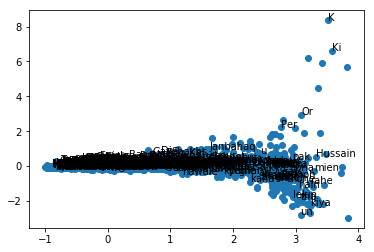

In [18]:
plt.scatter(X_reduced_2D[:, 0], X_reduced_2D[:, 1])
for i, word in enumerate(words):
    if i < 1000:
        plt.annotate(word, xy=(X_reduced_2D[i, 0,], X_reduced_2D[i, 1]))
    else: 
        break